In [1]:
# load imports
import timeit
import pandas as pd
import time
import matplotlib.pyplot as plt
from Graph import Graph

In [2]:
# load functions
def importGraphEdges(filename, graph:Graph):
    fh = open(filename)
    for line in fh:
        line = line.split(',')
        graph.addEdge(line[0], line[1], int(line[2]))


nodes_list = []
def importGeoData(filename, graph:Graph):
    geo_data = {} # {str:tuple}
    fh = open(filename)
    for line in fh:
        line = line.rstrip()
        line = line.split(',')
        nodes_list.append(line[0])
        graph.addNode(line[0])

        geo_data[line[0]] = (line[1], line[2])

    return geo_data

# benchmark
def benchFunction(graph:Graph):
    bench_time = [["Dijkstra distance and Time", "BFS distance and Time", "DFS distance and Time", "A Star distance and Time"]] # [[tuples:(dist, time)]]
    n = len(nodes_list)
    # print(n)
    for i in range(n):
        for j in range(i + 1, n):
            nod1 = nodes_list[i]
            nod2 = nodes_list[j]
            round_time = []

            start_time = time.perf_counter()
            distance = graph.djikstraSearch(nod1, nod2)[0]
            end_time = time.perf_counter()
            round_time.append((distance, end_time - start_time))

            start_time = time.perf_counter()
            distance = graph.bfs(nod1, nod2)[0]
            end_time = time.perf_counter()
            round_time.append((distance, end_time - start_time))

            start_time = time.perf_counter()
            distance = graph.dfs(nod1, nod2)[0]
            end_time = time.perf_counter()
            round_time.append((distance, end_time - start_time))

            h = graph.evalHeuristic(nod2, geo_data)
            start_time = time.perf_counter()
            distance = graph.aStarSearchOuterHeuristic(nod1, nod2, h)[0]
            end_time = time.perf_counter()
            round_time.append((distance, end_time - start_time))

            bench_time.append(round_time)

    return bench_time


def col_sum(arr, col):
    dist_sum, time_sum = 0, 0
    for i in range(1, len(arr)):
        dist_sum += arr[i][col][0]
        time_sum += arr[i][col][1]

    return (dist_sum, time_sum)


bfs_avg_data = [] # [(avg_dist, avg_time)]
dfs_avg_data = []
djk_avg_data = []
astar_avg_data = []
def populateAvgDataOf(graph: Graph):
    bench_data = None
    for i in range(5):
        bench_data = benchFunction(graph)
        data_len = len(bench_data)
        djk_sum = col_sum(bench_data, 0)
        djk_avg_data.append((djk_sum[0]/data_len, djk_sum[1]/data_len))

        bfs_sum = col_sum(bench_data, 1)
        bfs_avg_data.append((bfs_sum[0]/data_len, bfs_sum[1]/data_len))

        dfs_sum = col_sum(bench_data, 2)
        dfs_avg_data.append((dfs_sum[0]/data_len, dfs_sum[1]/data_len))

        astar_sum = col_sum(bench_data, 3)
        astar_avg_data.append((astar_sum[0]/data_len, astar_sum[1]/data_len))

    return bench_data


def exportDataToExcel(data_list, excel_name):
    writer = pd.ExcelWriter(excel_name)
    data_df = pd.DataFrame(data_list)
    data_df.to_excel(writer,index=False, sheet_name=excel_name[:-5])
    writer.save()


def plotBenchTime():
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    search_algos = ['BFS time', 'DFS time', 'Dijkstra time', 'a star time']
    avg_time = [
    sum([avg_data[1] for avg_data in bfs_avg_data]) / 5,
    sum([avg_data[1] for avg_data in dfs_avg_data]) / 5,
    sum([avg_data[1] for avg_data in djk_avg_data]) / 5,
    sum([avg_data[1] for avg_data in astar_avg_data]) / 5
    ]
    ax.bar(search_algos, avg_time)
    ax.set_title('Time benchmark results')
    ax.set_xlabel('Search Algorithm')
    ax.set_ylabel('Average time')
    plt.show()


def plotBenchDist():
    search_algos = ['BFS distance', 'DFS distance', 'Dijkstra distance', 'a star distance']
    avg_dist = [
    sum([avg_data[0] for avg_data in bfs_avg_data]) / 5,
    sum([avg_data[0] for avg_data in dfs_avg_data]) / 5,
    sum([avg_data[0] for avg_data in djk_avg_data]) / 5,
    sum([avg_data[0] for avg_data in astar_avg_data]) / 5
    ]
    plt.bar(search_algos, avg_dist)
    plt.title('Average Distance benchmark results')
    plt.xlabel('Search Algorithm')
    plt.ylabel('Average Distance')
    plt.show()

In [3]:
# Question 2. the graph data from page 82(83) of the book is loaded, can be viewed using the method print within the graph
mapGraph = Graph()
geo_data = importGeoData('geoData.txt', mapGraph) # loads the nodes of the graph
importGraphEdges('page82.txt', mapGraph)    # loads the edges of the graph

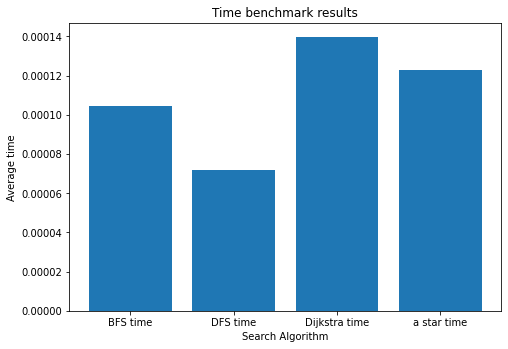

In [6]:
# Benchmark part
lastBenchData = populateAvgDataOf(mapGraph)
# exportDataToExcel(lastBenchData, 'Benchmark.xlsx') # export one raw data of the time and distance of it takes the four search algorithms from each node to every node in the graph to excel
plotBenchTime()

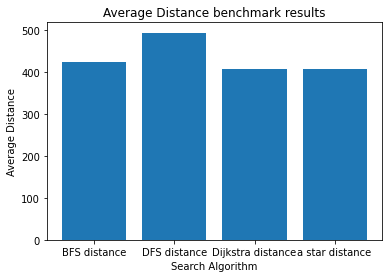

In [5]:
plotBenchDist()